## Trong dự án này,  tôi sẽ làm sạch và phân tích các cuộc khảo sát về việc thôi việc từ các nhân viên của Bộ Giáo dục, Đào tạo và Việc làm (DETE) và cơ quan Giáo dục Kỹ thuật và Nâng cao (TAFE) của chính phủ Queensland ở Úc

## Khám phá dữ liệu

In [1]:
import pandas as pd
import numpy as np


In [122]:
dete_survey = pd.read_csv("dete_survey.csv")



In [3]:
dete_survey["SeparationType"]


0                     Ill Health Retirement
1          Voluntary Early Retirement (VER)
2          Voluntary Early Retirement (VER)
3                 Resignation-Other reasons
4                            Age Retirement
                       ...                 
817                          Age Retirement
818                          Age Retirement
819    Resignation-Move overseas/interstate
820                   Ill Health Retirement
821    Resignation-Move overseas/interstate
Name: SeparationType, Length: 822, dtype: object

In [4]:
tafe_survey = pd.read_csv("tafe_survey.csv")

In [5]:
tafe_survey

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,No,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


## DROP dữ liệu không cần thiết và chỉnh sửa

In [6]:
dete_survey = pd.read_csv("dete_survey.csv",na_values='Not Stated')

In [7]:
## DROP columns 

In [8]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis = 1)

In [9]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis = 1)

## Đổi tên cột

In [10]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(" ","_").str.lower().str.strip()

In [11]:
mapping = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}

In [12]:
tafe_survey_updated = tafe_survey_updated.rename(mapping,axis = 1)

In [13]:
tafe_survey_updated

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


## Fill dữ liệu

In [14]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [16]:
## Sửa tên cột

In [17]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]


## Lọc dữ liệu

In [18]:

dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()

In [19]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

##  Kiểm tra dữ liệu

In [20]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [21]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]

In [22]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

In [23]:
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [24]:
dete_resignations["dete_start_date"].astype(float).round(0)

3      2005.0
5      1994.0
8      2009.0
9      1997.0
11     2009.0
        ...  
808    2010.0
815    2012.0
816    2012.0
819    2009.0
821       NaN
Name: dete_start_date, Length: 311, dtype: float64

In [25]:
tafe_resignations["cease_date"]

3      2010.0
4      2010.0
5      2010.0
6      2010.0
7      2010.0
        ...  
696    2013.0
697    2013.0
698    2013.0
699    2013.0
701    2013.0
Name: cease_date, Length: 340, dtype: float64

## Tạo cột mới phục vụ cho việc phân tích


In [26]:
# Điền dữ liệu còn thiếu
dete_resignations['cease_date'] = dete_resignations['cease_date'].fillna(0)
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].fillna(0)
dete_resignations['cease_date'].astype(int)
dete_resignations['dete_start_date'].astype(int)


3      2005
5      1994
8      2009
9      1997
11     2009
       ... 
808    2010
815    2012
816    2012
819    2009
821       0
Name: dete_start_date, Length: 311, dtype: int64

In [27]:
#Thêm cột năm làm việc
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']


In [28]:
## Kiểm tra chất lượng công việc 
dete_resignations[["job_dissatisfaction","dissatisfaction_with_the_department","physical_work_environment","lack_of_recognition","lack_of_job_security","work_location","employment_conditions","work_life_balance","workload"]].head()


,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False


In [29]:
## Kiểm tra chất lượng công việc
tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
...,...,...
696,-,-
697,-,-
698,-,-
699,-,-


In [30]:
## Viết Fc update value
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return False
    else:
        return True
        
    

In [61]:
## Thêm cột
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

In [62]:
##Thêm cột
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()


## Kết hợp dữ liệu

In [74]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"
## Kết hợp  
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)


In [80]:
## Kiểm tra dữ liệu bị thiếu
combined.notnull().sum().sort_values()
##Loc dữ liệu 
combined_updated = combined.dropna(thresh = 500, axis =1).copy()


In [87]:
## Clean service column
combined_updated["institute_service"].value_counts().head(50)

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
0.0                   21
7-10                  21
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
2012.0                14
7.0                   13
2013.0                13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
22.0                   6
17.0                   6
14.0                   6
12.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
39.0                   3
32.0                   3
19.0                   3
21.0                   3
30.0                   2
25.0                   2
28.0                   2
36.0                   2


In [100]:
## Trích năm
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract("(\d+)")
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
## Kiểm tra
combined_updated['institute_service_up'].value_counts()

1.0       159
3.0        83
5.0        56
7.0        34
11.0       30
0.0        21
6.0        17
20.0       17
4.0        16
2012.0     15
9.0        14
2.0        14
2013.0     13
8.0         8
13.0        8
15.0        7
17.0        6
22.0        6
14.0        6
10.0        6
12.0        6
18.0        5
16.0        5
24.0        4
23.0        4
21.0        3
32.0        3
39.0        3
19.0        3
28.0        2
26.0        2
30.0        2
36.0        2
25.0        2
29.0        1
49.0        1
2005.0      1
1990.0      1
1987.0      1
2006.0      1
1995.0      1
41.0        1
27.0        1
2011.0      1
2000.0      1
31.0        1
34.0        1
35.0        1
38.0        1
33.0        1
42.0        1
1984.0      1
2007.0      1
Name: institute_service_up, dtype: int64

In [101]:
## Chia số năm làm việc thành từng đoạn
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

        

In [107]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)


In [108]:
## Kiểm tra
combined_updated['service_cat'].value_counts()

New            194
Veteran        173
Experienced    172
Established     62
Name: service_cat, dtype: int64

## Phân tích dữ liệu

In [111]:
## Kiểm tra dữ liệu
combined_updated.isnull().sum()

id                       0
separationtype           0
cease_date               5
position                53
employment_status       54
gender                  59
age                     55
institute_service       50
dissatisfied             8
institute                0
institute_service_up    50
service_cat             50
dtype: int64

In [113]:
## THêm các dữ liệu bi thiếu
combined_updated['dissatisfied'] = combined_updated["dissatisfied"].fillna(False)

## Trực quan hóa mối quan hệ của độ tuổi với độ không hài lòng với công việc


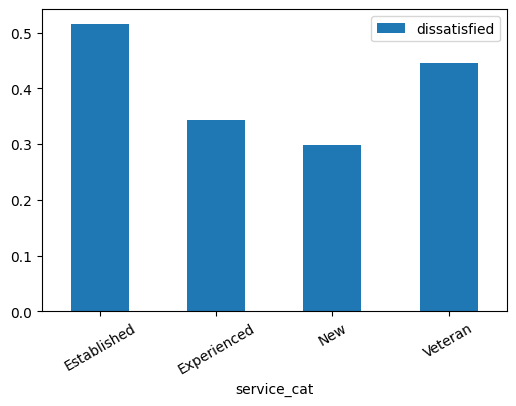

In [114]:
## Bảng tần số
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
## Trực quam hóa
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

## Kết luận 
Từ đồ thị cho ta thấy được, sô người làm mới làm việc có tỉ lệ không hài lòng thấp nhất, độ tuổi làm việc vào khoảng 3 đến 7 năm có mức không hài lòng cao nhất về các vấn đề trong công ty

## Trực quan hóa mối quan hệ giữa ngành nghề với độ không hài lòng về công việc

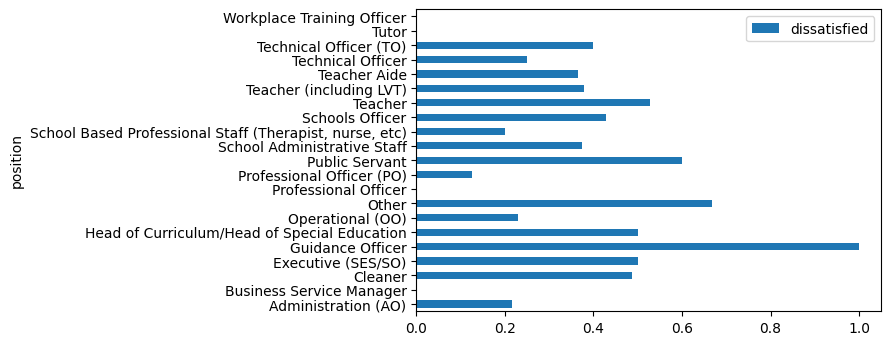

In [119]:
## bảng tần số
dis_pos = combined_updated.pivot_table(index='position', values='dissatisfied')
## Trực quam hóa
%matplotlib inline
dis_pos.plot(kind='barh', rot=0)

## Kết luận
Dựa vào biểu đồ cột ngang, ta thấy được vị trí cán bộ hướng dẫn có độ bất mãn với công việc cao nhất, và có 1 khoảng cách khá xa so với các vị trí còn lại (cách vị trí gần nhất là 0,3) và gần như là toàn bộ vị trí này đều bất mãn với công việc, buộc chúng ta phải phân tích kĩ hơn vào vào trí này để tìm hiểu nguyên nhân